In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import scipy


In [55]:
df = pd.read_csv('training_set_VU_DM.csv')

display(df.head())
df.info()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

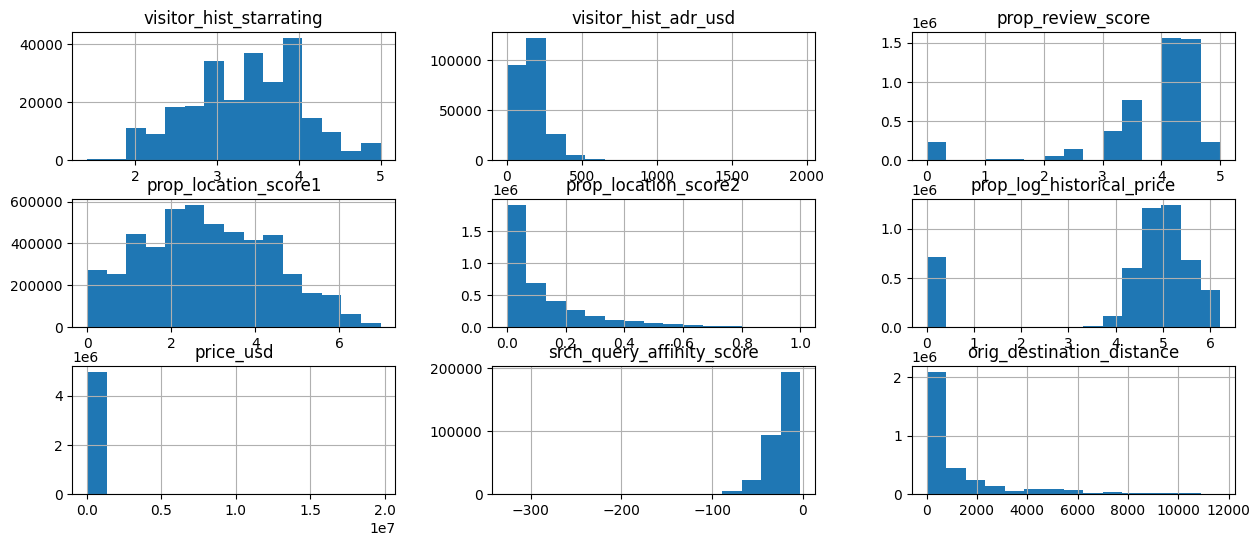

In [56]:
# Histograms for numerical columns

float_columns = df.select_dtypes(include=['float64']).columns.tolist()
float_non_comp = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'srch_query_affinity_score', 'orig_destination_distance']
df[float_non_comp].hist(bins=15, figsize=(15, 6), layout=(3, 3))
#df[float_columns].hist(bins=15, figsize=(15, 6), layout=(2, 17))

plt.show()


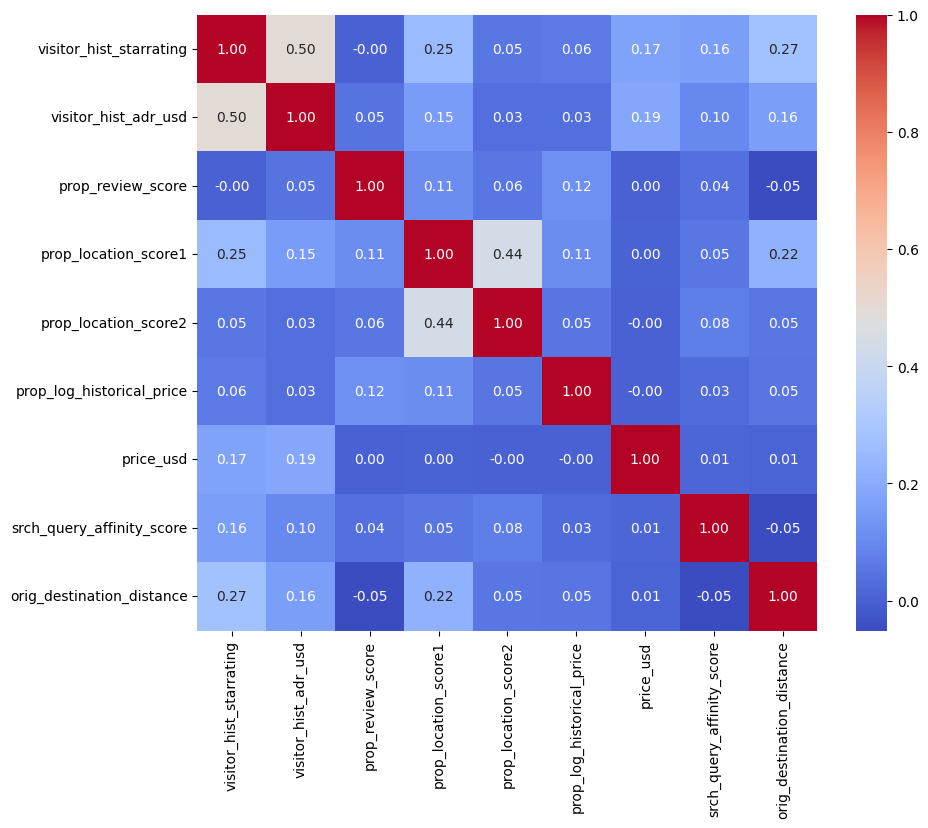

In [57]:

# Correlation matrix
corr_matrix = df[float_non_comp].select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



In [58]:
threshold = 0.5  # You can adjust this value
# Mask to avoid redundancy and diagonal correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Filtering the DataFrame
high_corr = corr_matrix.where(mask)  # Apply mask to zero out lower triangle and diagonal
correlated_pairs = high_corr.stack()  # Stack to multi-index series

# Filtering by threshold
significant_pairs = correlated_pairs[abs(correlated_pairs) > threshold]
print("Highly Correlated Features:")
for (feature1, feature2), corr_value in significant_pairs.items():
    print(f"{feature1} and {feature2}: {corr_value:.2f}")


Highly Correlated Features:


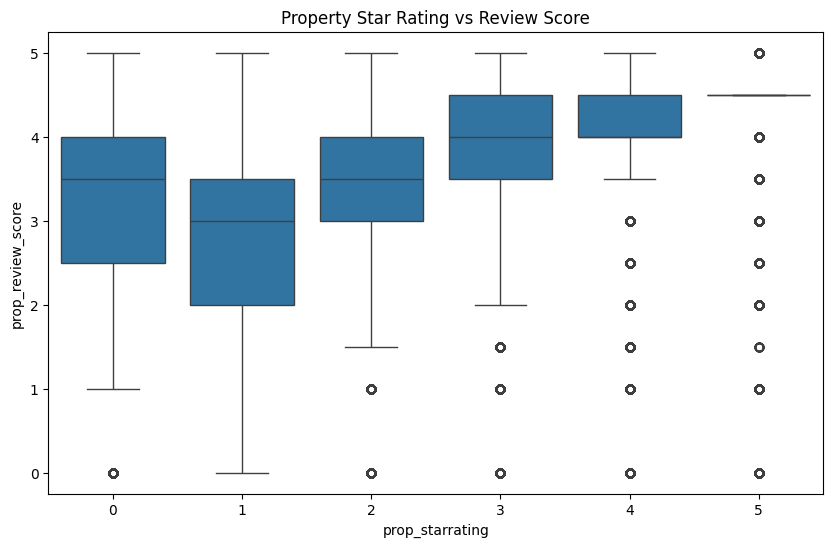

In [59]:
# Boxplot for property star rating vs. review score
plt.figure(figsize=(10, 6))
sns.boxplot(x='prop_starrating', y='prop_review_score', data=df)
plt.title('Property Star Rating vs Review Score')
plt.show()


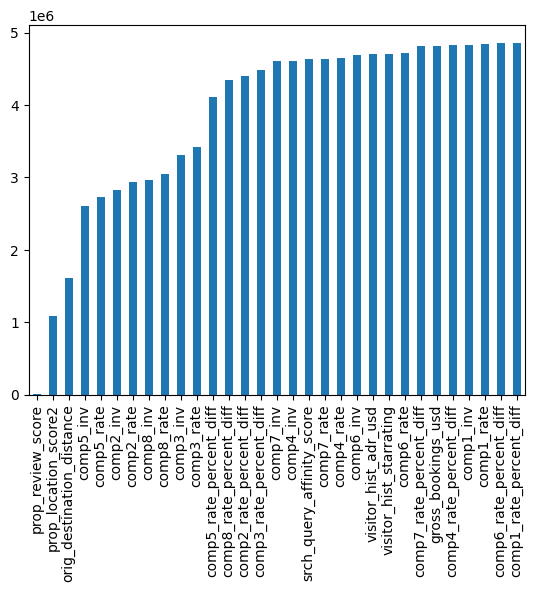

In [60]:
# Plotting missing data
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()


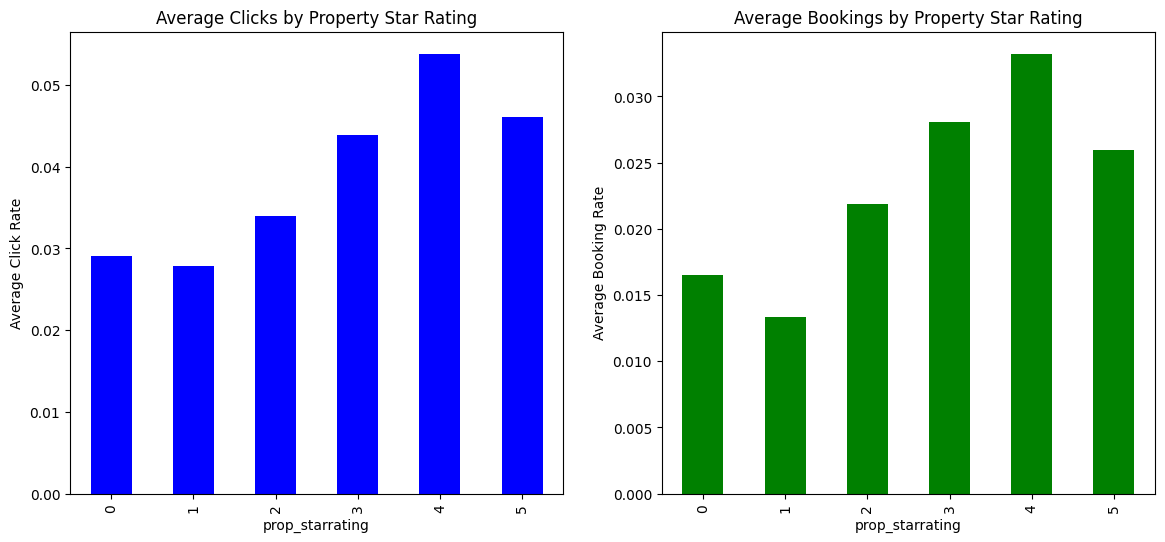

In [61]:
# Clicks and bookings by star rating
clicks_by_rating = df.groupby('prop_starrating')['click_bool'].mean()
bookings_by_rating = df.groupby('prop_starrating')['booking_bool'].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
clicks_by_rating.plot(kind='bar', color='blue')
plt.title('Average Clicks by Property Star Rating')
plt.ylabel('Average Click Rate')

plt.subplot(1, 2, 2)
bookings_by_rating.plot(kind='bar', color='green')
plt.title('Average Bookings by Property Star Rating')
plt.ylabel('Average Booking Rate')

plt.show()
